In [2]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

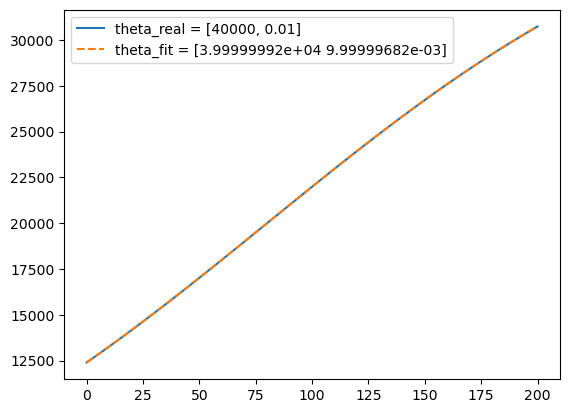

In [114]:
def y(theta, t):
    "logistic function"
    K, r = theta
    y = K / (1+np.exp(-r*(t-80)))
    return y

theta_real = [40000, 0.01]

ts = np.linspace(0,200)
noise = 0.01
ys = y(theta_real, ts) + noise*np.random.normal(size=ts.size)

def fun(theta):
    res = y(theta, ts) - ys
    # print(theta)
    # print(res.mean())
    return res

theta_initial_guess = [29000,0.1]
res = least_squares(fun, theta_initial_guess, diff_step=0.1)

plt.plot(ts, y(theta_real, ts), label=f"theta_real = {theta_real}")
plt.plot(ts, y(res.x, ts), label=f"theta_fit = {res.x}", linestyle="--")
plt.legend()
plt.show()